In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
data=pd.read_csv('/content/Automobile_data (1).csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
data=data.replace('?',0)
data['price'] = data['price'].astype(float)
temp = data.copy()
table = temp.groupby(['make'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='make')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsrange
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0,Medium
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0,Medium


In [ ]:
data['fueleconomy'] = (0.55 * data['city-mpg']) + (0.45 * data['highway-mpg'])

In [ ]:
data=data.drop(['make','num-of-doors','drive-wheels','fuel-system','engine-type','num-of-cylinders','symboling','fueleconomy'],axis=1)

data=data.replace('gas',1)
data=data.replace('diesel',2)
data=data.replace('std',1)
data=data.replace('turbo',2)
data=data.replace('front',1)
data=data.replace('rear',2)
data

,normalized-losses,fuel-type,aspiration,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsrange
0,0,1,1,convertible,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
1,0,1,1,convertible,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,0,1,1,hatchback,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,164,1,1,sedan,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950.0,Medium
4,164,1,1,sedan,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,1,1,sedan,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,Medium
201,95,1,2,sedan,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,Medium
202,95,1,1,sedan,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,Medium
203,95,2,2,sedan,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.4,23.0,106,4800,26,27,22470.0,Medium


In [ ]:
data=data.replace('convertible',1)
data=data.replace('hatchback',2)
data=data.replace('sedan',3)
data=data.replace('wagon',4)
data=data.replace('hardtop',5)
data

,normalized-losses,fuel-type,aspiration,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsrange
0,0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
1,0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,0,1,1,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,164,1,1,3,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950.0,Medium
4,164,1,1,3,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,1,1,3,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,Medium
201,95,1,2,3,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,Medium
202,95,1,1,3,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,Medium
203,95,2,2,3,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.4,23.0,106,4800,26,27,22470.0,Medium


In [ ]:
data=data.replace('Budget',1)
data=data.replace('Medium',2)
data=data.replace('Highend',3)

In [ ]:
x=data.drop('price',axis=1).astype(float)
y=data['carsrange'].astype(float)
y

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
200    2.0
201    2.0
202    2.0
203    2.0
204    2.0
Name: carsrange, Length: 205, dtype: float64

In [ ]:
from sklearn. feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(x, y)

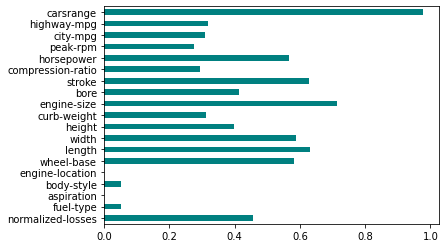

In [ ]:
feat=pd.Series(importances,x.columns[0:len(x.columns)])
feat.plot(kind='barh',color='teal')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features=SelectKBest(chi2,k=3)
X_kbest_features=chi2_features.fit_transform(x,y)
print('Original feature number : ',x.shape[1])
print('Reduced feature number : ',X_kbest_features.shape[1])

Original feature number :  19
Reduced feature number :  3


In [ ]:
X_kbest_features #curbweight,enginesize,horsepower

array([[2548.,  130.,  111.],
       [2548.,  130.,  111.],
       [2823.,  152.,  154.],
       [2337.,  109.,  102.],
       [2824.,  136.,  115.],
       [2507.,  136.,  110.],
       [2844.,  136.,  110.],
       [2954.,  136.,  110.],
       [3086.,  131.,  140.],
       [3053.,  131.,  160.],
       [2395.,  108.,  101.],
       [2395.,  108.,  101.],
       [2710.,  164.,  121.],
       [2765.,  164.,  121.],
       [3055.,  164.,  121.],
       [3230.,  209.,  182.],
       [3380.,  209.,  182.],
       [3505.,  209.,  182.],
       [1488.,   61.,   48.],
       [1874.,   90.,   70.],
       [1909.,   90.,   70.],
       [1876.,   90.,   68.],
       [1876.,   90.,   68.],
       [2128.,   98.,  102.],
       [1967.,   90.,   68.],
       [1989.,   90.,   68.],
       [1989.,   90.,   68.],
       [2191.,   98.,  102.],
       [2535.,  122.,   88.],
       [2811.,  156.,  145.],
       [1713.,   92.,   58.],
       [1819.,   92.,   76.],
       [1837.,   79.,   60.],
       [19

In [ ]:
#x=x.drop(['normalized-losses','curb-weight','peak-rpm'],axis=1)
#x

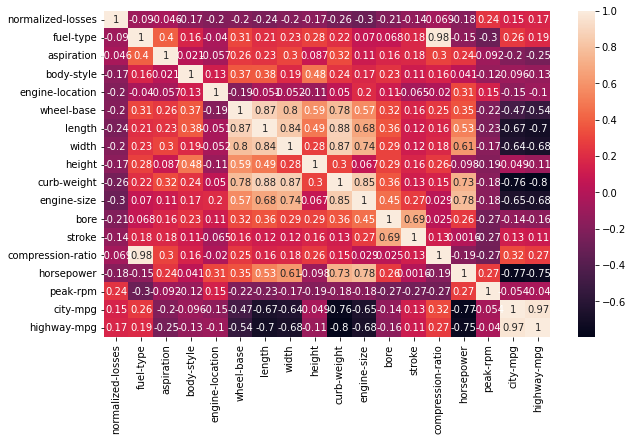

In [ ]:
import seaborn as sns
cor=x.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True) #Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth,length

In [ ]:
sns.pairplot(x)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa90929a160> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa90903ad30> (for post_execute):


KeyboardInterrupt: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


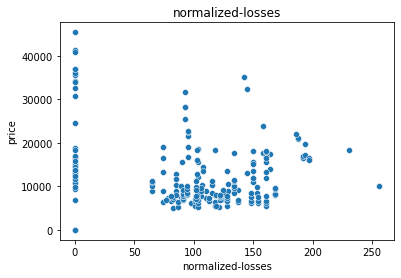

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


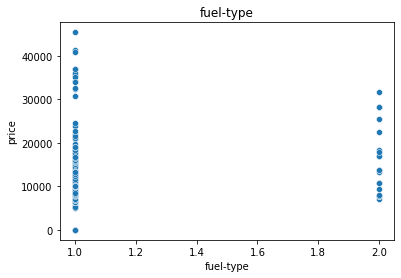

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


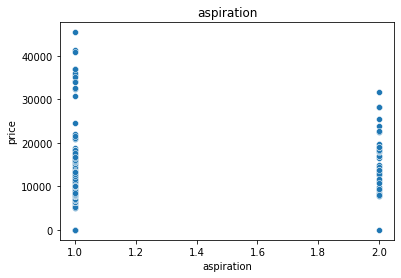

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


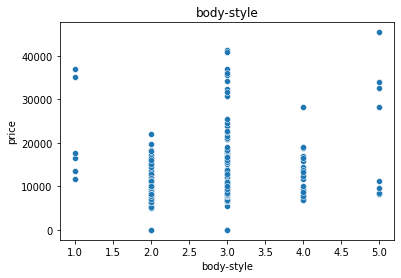

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


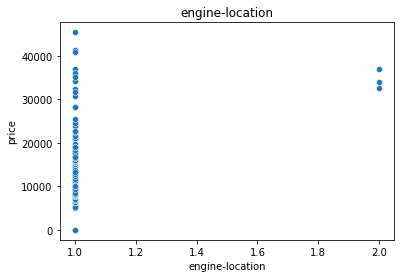

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


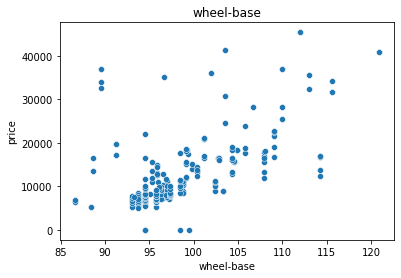

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


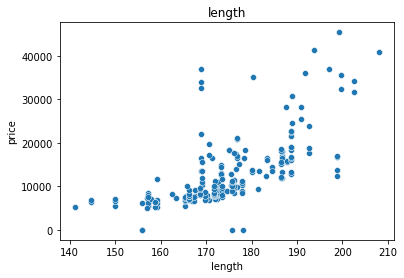

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


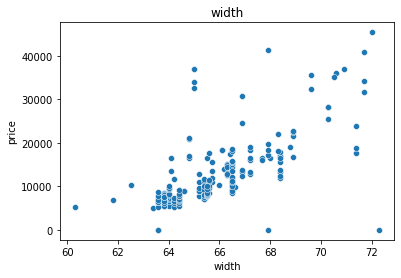

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


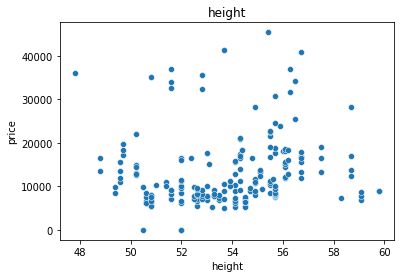

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


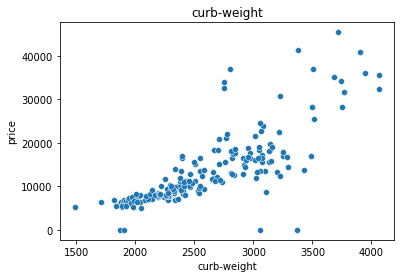

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


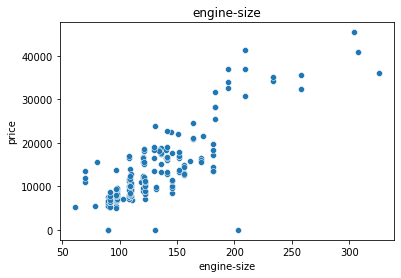

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


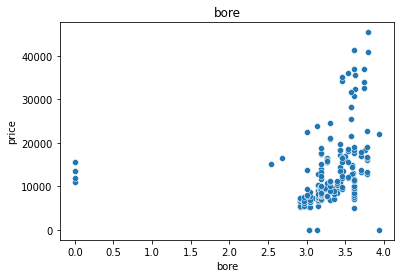

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


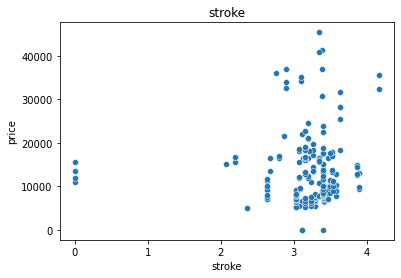

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


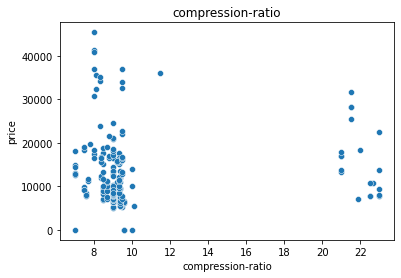

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


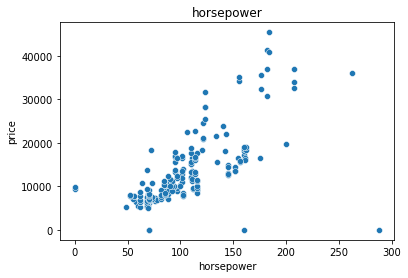

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


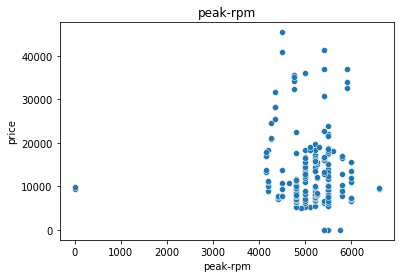

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


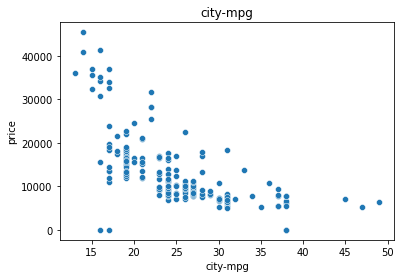

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


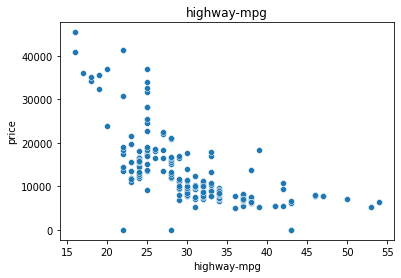

In [ ]:
for i in x.columns:
    plt.title(i)
    sns.scatterplot(x[i],y)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


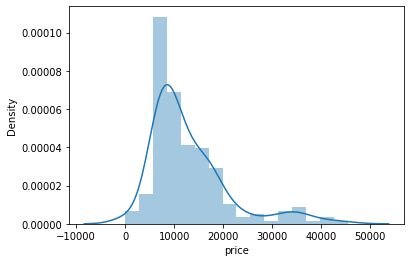

In [ ]:
sns.distplot(y)

In [ ]:
cor=data.corr(method ='pearson')
round(cor,2)

,fuel-type,aspiration,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
fuel-type,1.00,0.40,0.16,-0.04,0.31,0.21,0.23,0.28,0.22,0.07,0.98,0.26,0.19
aspiration,0.40,1.00,0.02,-0.06,0.26,0.23,0.30,0.09,0.32,0.11,0.30,-0.20,-0.25
body-style,0.16,0.02,1.00,0.13,0.37,0.38,0.19,0.48,0.24,0.17,0.16,-0.10,-0.13
engine-location,-0.04,-0.06,0.13,1.00,-0.19,-0.05,-0.05,-0.11,0.05,0.20,-0.02,-0.15,-0.10
wheel-base,0.31,0.26,0.37,-0.19,1.00,0.87,0.80,0.59,0.78,0.57,0.25,-0.47,-0.54
length,0.21,0.23,0.38,-0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.16,-0.67,-0.70
width,0.23,0.30,0.19,-0.05,0.80,0.84,1.00,0.28,0.87,0.74,0.18,-0.64,-0.68
height,0.28,0.09,0.48,-0.11,0.59,0.49,0.28,1.00,0.30,0.07,0.26,-0.05,-0.11
curb-weight,0.22,0.32,0.24,0.05,0.78,0.88,0.87,0.30,1.00,0.85,0.15,-0.76,-0.80
engine-size,0.07,0.11,0.17,0.20,0.57,0.68,0.74,0.07,0.85,1.00,0.03,-0.65,-0.68


In [ ]:
corr=data.corr(method='kendall')
round(corr,2)

,fuel-type,aspiration,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
fuel-type,1.00,0.40,0.17,-0.04,0.23,0.16,0.19,0.25,0.16,0.11,0.44,0.20,0.13
aspiration,0.40,1.00,0.02,-0.06,0.19,0.20,0.26,0.09,0.28,0.19,-0.12,-0.18,-0.23
body-style,0.17,0.02,1.00,0.07,0.35,0.31,0.15,0.43,0.21,0.14,0.07,-0.06,-0.09
engine-location,-0.04,-0.06,0.07,1.00,-0.16,-0.06,-0.04,-0.10,0.06,0.15,0.12,-0.15,-0.09
wheel-base,0.23,0.19,0.35,-0.16,1.00,0.75,0.65,0.46,0.61,0.50,-0.11,-0.37,-0.41
length,0.16,0.20,0.31,-0.06,0.75,1.00,0.72,0.37,0.72,0.60,-0.14,-0.51,-0.53
width,0.19,0.26,0.15,-0.04,0.65,0.72,1.00,0.26,0.69,0.59,-0.12,-0.52,-0.53
height,0.25,0.09,0.43,-0.10,0.46,0.37,0.26,1.00,0.24,0.16,-0.02,-0.05,-0.09
curb-weight,0.16,0.28,0.21,0.06,0.61,0.72,0.69,0.24,1.00,0.72,-0.17,-0.65,-0.67
engine-size,0.11,0.19,0.14,0.15,0.50,0.60,0.59,0.16,0.72,1.00,-0.19,-0.59,-0.58


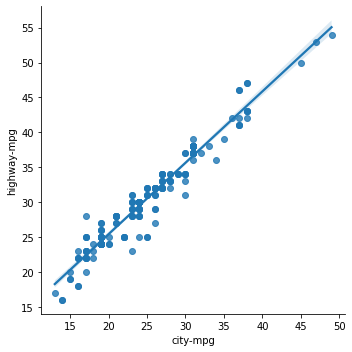

In [ ]:
sns.lmplot(x="city-mpg", y="highway-mpg", data=data);

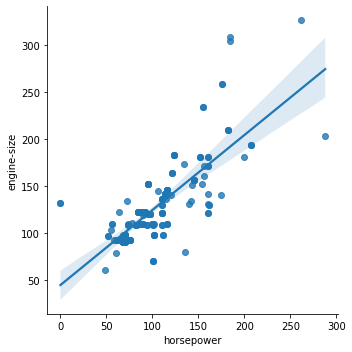

In [ ]:
data['horsepower']=data['horsepower'].astype(int)
data['engine-size']=data['engine-size'].astype(int)
sns.lmplot(x="horsepower", y="engine-size", data=data);

In [ ]:
data['horsepower']=data['horsepower'].astype(int)
classA=data.loc[(data['horsepower']<100) | (data['engine-size']<100)]
classB=data.loc[(data['horsepower']>=100) | (data['engine-size']>=100)]
classA

,normalized-losses,fuel-type,aspiration,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,carsrange
18,121,1,1,2,1,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.50,48,5100,47,53,5151.0,1
19,98,1,1,2,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.60,70,5400,38,43,6295.0,1
20,81,1,1,3,1,94.5,158.8,63.6,52.0,1909,90,3.03,3.11,9.60,70,5400,38,43,6575.0,1
21,118,1,1,2,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68,5500,37,41,5572.0,1
22,118,1,1,2,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.40,68,5500,31,38,6377.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,94,2,2,3,1,97.3,171.7,65.5,55.7,2319,97,3.01,3.4,23.00,68,4500,37,42,9495.0,2
189,0,1,1,1,1,94.5,159.3,64.2,55.6,2254,109,3.19,3.4,8.50,90,5500,24,29,11595.0,2
190,256,1,1,2,1,94.5,165.7,64.0,51.4,2221,109,3.19,3.4,8.50,90,5500,24,29,9980.0,2
192,0,2,2,3,1,100.4,180.2,66.9,55.1,2579,97,3.01,3.4,23.00,68,4500,33,38,13845.0,2


In [ ]:
classA['price']=classA['price'].astype(int)
classB['price']=classB['price'].astype(int)
meanA=classA['price'].mean()
meanB=classB['price'].mean()
stdA=classA['price'].std()
stdB=classB['price'].std()
distance=np.linalg.norm(meanA-meanB)
distance

6535.974984746796

In [ ]:
#x=data[['horsepower','peak-rpm','city-mpg','highway-mpg']].astype(float)
#y=data['price'].astype(float)
#x

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sclar=MinMaxScaler()
x=sclar.fit_transform(x)
x

array([[0.        , 0.        , 0.        , ..., 0.22222222, 0.28947368,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.28947368,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.26315789,
        0.5       ],
       ...,
       [0.37109375, 0.        , 0.        , ..., 0.13888889, 0.18421053,
        0.5       ],
       [0.37109375, 1.        , 1.        , ..., 0.36111111, 0.28947368,
        0.5       ],
       [0.37109375, 0.        , 1.        , ..., 0.16666667, 0.23684211,
        0.5       ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.339844,0.0,0.0,0.25,0.0,0.265306,0.262687,0.275000,0.558333,0.214119,0.116981,0.774112,0.726619,0.12500,0.215278,0.727273,0.500000,0.578947,0.0
1,0.000000,0.0,1.0,0.25,0.0,0.271137,0.479104,0.500000,0.200000,0.515904,0.358491,0.911168,0.925659,0.00000,0.503472,0.757576,0.166667,0.210526,0.0
2,0.500000,1.0,0.0,0.50,0.0,0.230321,0.361194,0.291667,0.558333,0.205198,0.158491,0.758883,0.832134,0.93125,0.190972,0.727273,0.888889,0.894737,0.5
3,0.585938,0.0,0.0,0.25,0.0,0.253644,0.416418,0.450000,0.150000,0.346005,0.033962,0.000000,0.000000,0.15000,0.350694,0.909091,0.111111,0.184211,0.5
4,0.441406,0.0,0.0,0.50,0.0,0.189504,0.383582,0.325000,0.525000,0.179209,0.113208,0.781726,0.755396,0.12500,0.236111,0.757576,0.500000,0.578947,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.316406,0.0,0.0,0.50,0.0,0.230321,0.264179,0.275000,0.350000,0.163305,0.109434,0.769036,0.745803,0.16250,0.243056,0.818182,0.694444,0.710526,0.0
139,0.523438,0.0,0.0,0.00,0.0,0.344023,0.523881,0.441667,0.433333,0.576804,0.320755,0.918782,0.839329,0.14375,0.402778,0.727273,0.305556,0.368421,0.0
140,0.371094,0.0,0.0,0.50,0.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.959391,0.755396,0.15625,0.395833,0.818182,0.277778,0.315789,0.5
141,0.355469,0.0,0.0,0.50,0.0,0.265306,0.376119,0.341667,0.433333,0.230023,0.139623,0.809645,0.726619,0.12500,0.243056,0.727273,0.472222,0.552632,0.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [ ]:
X_train.columns[rfe.support_]

Int64Index([5, 6, 7, 10, 12, 14, 16, 17, 18], dtype='int64')

In [ ]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 9
Selected Features: [False False False False False  True  True  True False False  True False
  True False  True False  True  True  True]
Feature Ranking: [ 7  3  5 11  9  1  1  1  4  6  1  8  1 10  1  2  1  1  1]


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.score(X_test,y_test)

0.9838709677419355

In [ ]:
neigh.predict(X_test)

array([2., 1., 1., 1., 2., 1., 2., 3., 2., 2., 3., 1., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 3., 2., 1., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 2., 3., 2., 1., 1., 3., 1., 2., 1., 1., 2., 2.,
       1., 2., 1., 2., 2., 1., 1., 1., 3., 1., 1.])

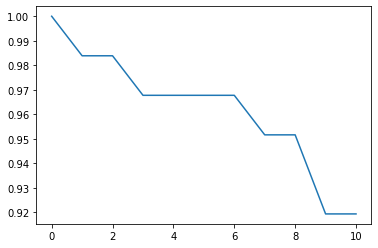

In [ ]:
test=[]
for i in range(1,12):
   neigh = KNeighborsClassifier(n_neighbors=i)
   neigh.fit(x,y)
   test.append(neigh.score(X_test,y_test))

plt.plot(test)
plt.show()

In [ ]:
from sklearn import svm
import time
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
clf.support_vectors_

array([[0.30078125, 0.        , 0.        , ..., 0.5       , 0.55263158,
        0.        ],
       [0.35546875, 1.        , 0.        , ..., 0.69444444, 0.81578947,
        0.        ],
       [0.76953125, 0.        , 0.        , ..., 0.16666667, 0.21052632,
        0.        ],
       ...,
       [0.7265625 , 0.        , 0.        , ..., 0.16666667, 0.28947368,
        1.        ],
       [0.36328125, 1.        , 1.        , ..., 0.25      , 0.23684211,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02777778, 0.        ,
        1.        ]])

In [ ]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for linear kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for linear kernal: 1.0
Time for Training: 0.001992940902709961


In [ ]:
clf=svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for poly kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for poly kernal: 1.0
Time for Training: 0.0031249523162841797


In [ ]:
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for rbf kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for rbf kernal: 0.967741935483871
Time for Training: 0.004017353057861328


In [ ]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for sigmoid kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for sigmoid kernal: 0.46774193548387094
Time for Training: 0.0041544437408447266


In [ ]:
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score: 0.46774193548387094
Time for Training: 0.002624034881591797


In [ ]:
clf.predict(X_test)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
start=time.time()
mlp.fit(X_train,y_train)
print('MLP Score:',mlp.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

MLP Score: 0.972027972027972
Time for Training: 0.36548352241516113


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

array([[0.40625   , 0.        , 1.        , ..., 0.16666667, 0.26315789,
        0.5       ],
       [0.3984375 , 0.        , 0.        , ..., 0.36111111, 0.42105263,
        0.        ],
       [0.6015625 , 0.        , 0.        , ..., 0.5       , 0.57894737,
        0.        ],
       ...,
       [0.75      , 0.        , 0.        , ..., 0.27777778, 0.34210526,
        1.        ],
       [0.35546875, 1.        , 0.        , ..., 0.58333333, 0.52631579,
        0.        ],
       [0.4140625 , 0.        , 0.        , ..., 0.38888889, 0.44736842,
        0.        ]])

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [ ]:
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))

Tree Graph Classifier Score :  1.0


In [ ]:
print('Tree Graph Classifier Score : ',model.score(X_test,y_test))

Tree Graph Classifier Score :  1.0


In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))

Tree Graph Classifier Score :  1.0


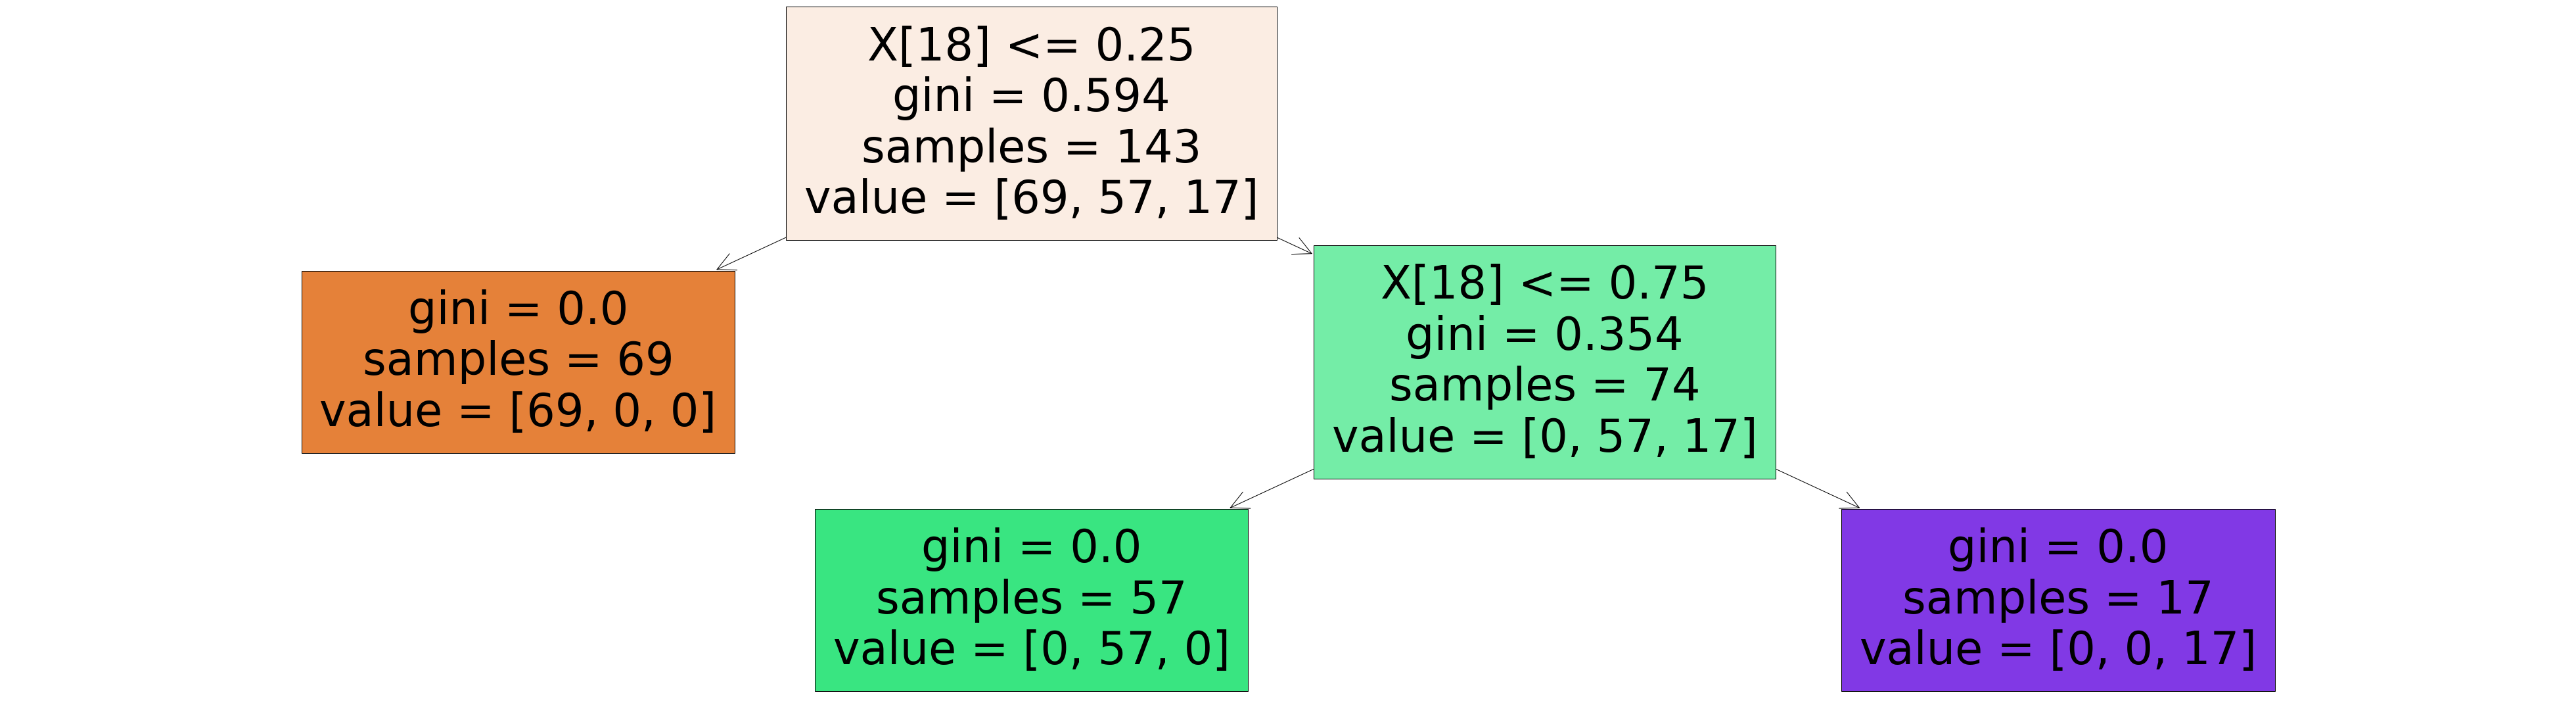

In [ ]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))

Tree Graph Classifier Score :  1.0


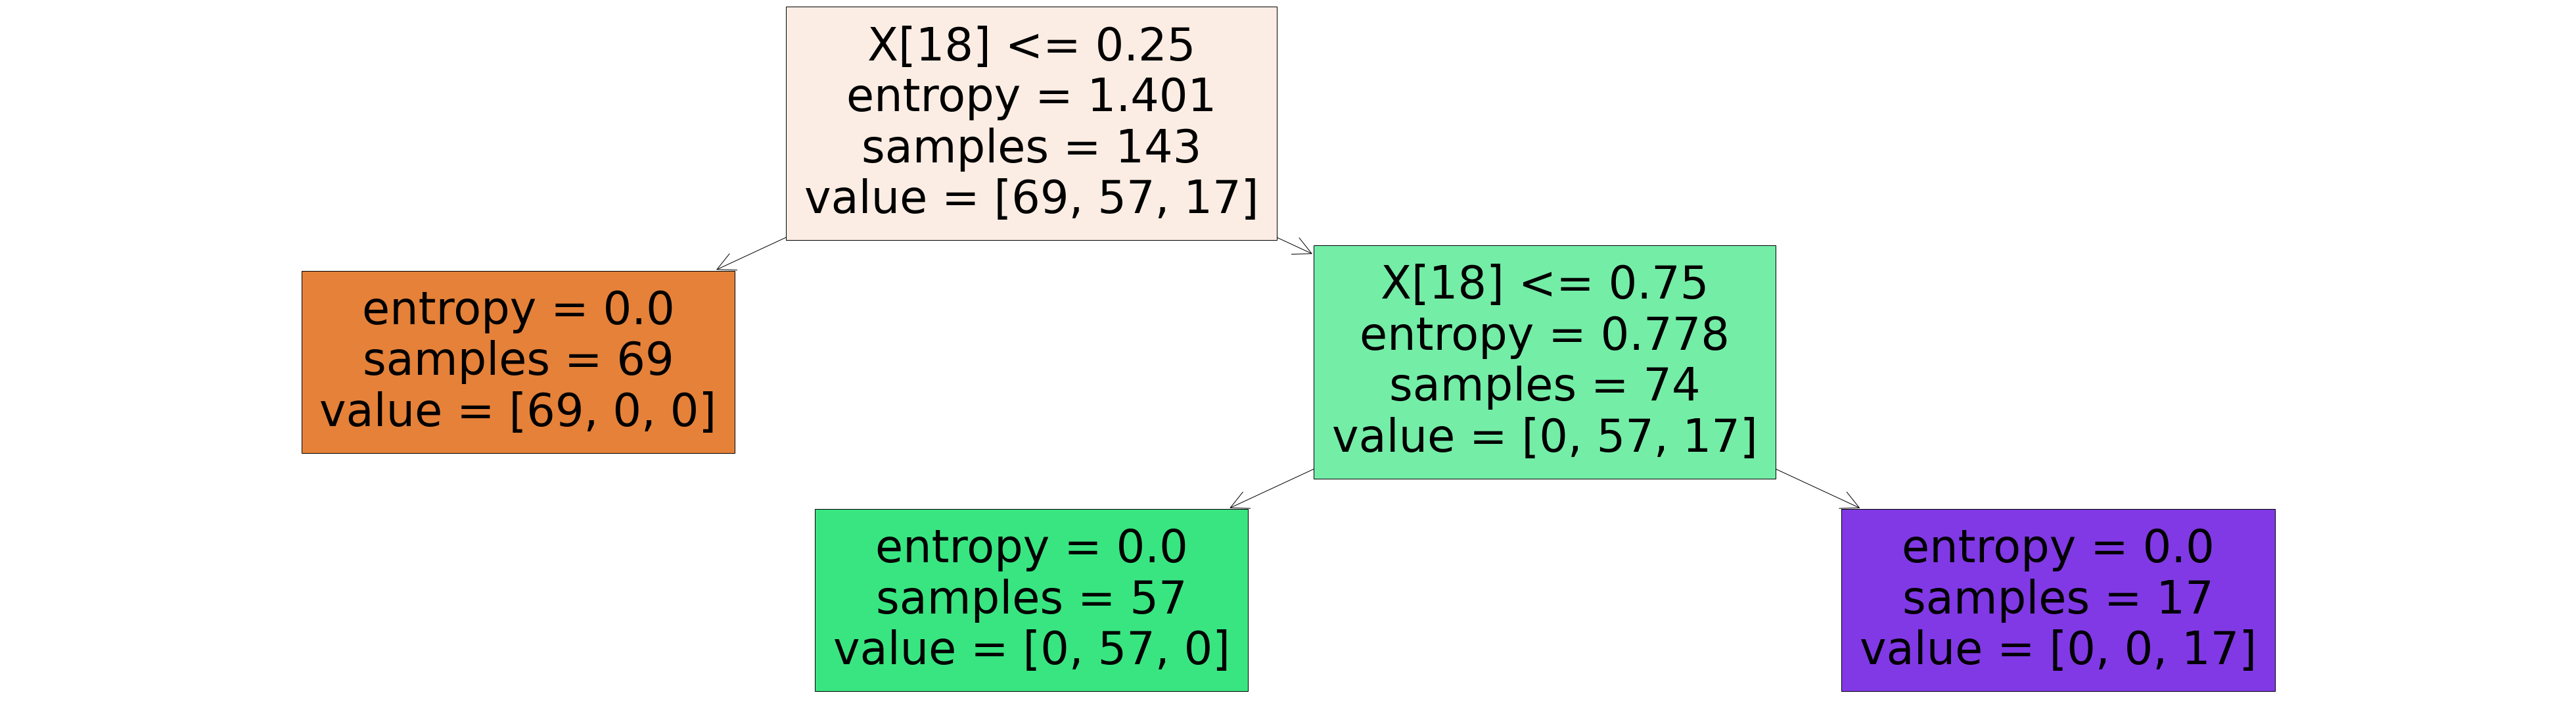

In [ ]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_test,y_test))

Tree Graph Classifier Score :  1.0


In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
print("No.of correctly classified samples for Decision Tree Classifier is: ",accuracy_score(y_test, pred, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Decision Tree Classifier is: ",zero_one_loss(y_test, pred, normalize=False))

No.of correctly classified samples for Tree Graph Regressor is:  62
No.of wrongly classified samples for Tree Graph Regressor is:  0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


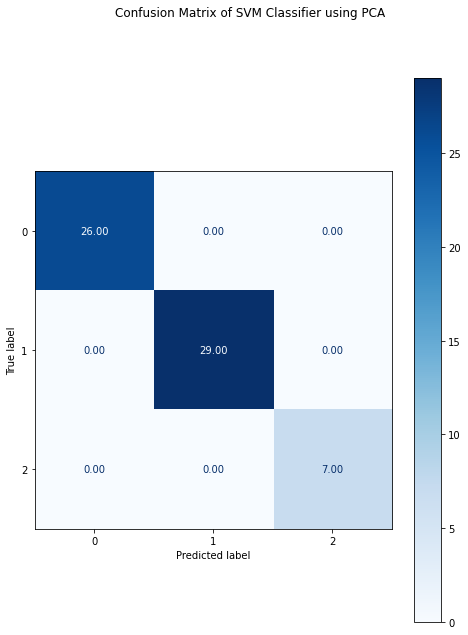

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(model, X_test, y_test,display_labels=["0",'1','2'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix of SVM Classifier using PCA")
plt.show()

In [ ]:
#USER DEFINED FUNCTION TO DISPLAY ROC-AUC PLOT
from sklearn.metrics import roc_curve,auc
def plot_roc(y_test,probs):
  fpr,tpr,threshold=roc_curve(y_test,probs)
  roc_auc=auc(fpr,tpr)
  print('ROC AUC=%0.2f'%roc_auc)
  plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'b--')
  plt.xlim([0,1])
  plt.ylim([0,1.05])
  plt.xlabel('False Postive Rate')
  plt.ylabel('True Postive Rate')
  plt.show()

In [ ]:
#USER DEFINED FUNCTION TO DISPLAY PRECISION-RECALL GRAPH
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
def show(y_test,y_predicted):
 precision, recall, _ = precision_recall_curve(y_test, y_predicted)
 disp = PrecisionRecallDisplay(precision=precision, recall=recall)
 disp.plot()

In [ ]:
pred1=[]
ytest1=[]
for i in pred:
  if i==1:
    pred1.append(i)
for i in y_test:
  if i==1:
    ytest1.append(i)

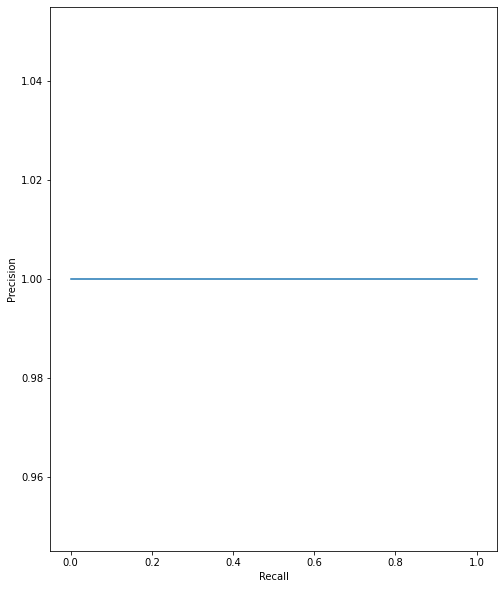

In [ ]:
show(ytest1,pred1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
print("GausianNB score:",model.score(X_train,y_train))

GausianNB score: 1.0


In [ ]:
x=data.drop(['price','carsrange'],axis=1).astype(float)
y=data['price'].astype(float)
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=linear_model.LinearRegression()

In [ ]:
start=time.time()
reg.fit(X_train,y_train)
print("Linear Regression score : ",reg.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Linear Regression score :  1.0
Time taken :  0.0072481632232666016


In [ ]:
pred=reg.predict(X_test)

In [ ]:
print("Coefficient : ",reg.coef_)

Coefficient :  [ 4.44392431e-15 -7.77156117e-16 -1.25062268e-15  8.56485022e-16
 -1.09779328e-15  9.48975961e-16  2.02081058e-15  8.82758724e-16
  1.89398593e-15  8.03728651e-16 -8.54079372e-16 -5.67537988e-16
  1.53094915e-16 -1.27424389e-16 -4.82090098e-16  1.19996672e-15
 -2.91886143e-16 -4.71844785e-16  2.00000000e+00]


In [ ]:
print("Mean square root : ",mean_squared_error(y_test,pred))

Mean square root :  1.776527482120706e-30


In [ ]:
print("r2 score : ",r2_score(y_test,pred))

r2 score :  1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)

In [ ]:
start=time.time()
log.fit(X_train,y_train)
print("Logistic Regressor score : ",log.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Logistic Regressor score :  0.9790209790209791
Time taken :  0.03263282775878906


In [ ]:
start=time.time()
log.fit(X_test,y_test)
print("Logistic Regressor score : ",log.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

Logistic Regressor score :  0.9516129032258065
Time taken :  0.015672922134399414


In [ ]:
pred_x=log.predict(X_test)
pred_x

array([2., 1., 1., 1., 2., 1., 2., 3., 2., 1., 3., 1., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 2., 2., 1., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 2., 3., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1.])

In [ ]:
log.predict_proba(X_test)

array([[0.14983673, 0.75905264, 0.09111063],
       [0.76692182, 0.21534257, 0.01773561],
       [0.82163919, 0.16941976, 0.00894105],
       [0.77640546, 0.21531282, 0.00828173],
       [0.26973961, 0.6568657 , 0.07339468],
       [0.71340557, 0.26323231, 0.02336212],
       [0.12789232, 0.7759109 , 0.09619678],
       [0.01032739, 0.30604085, 0.68363175],
       [0.14006338, 0.71165135, 0.14828527],
       [0.65479128, 0.32648519, 0.01872354],
       [0.0105474 , 0.48434663, 0.50510597],
       [0.81921361, 0.15966593, 0.02112047],
       [0.24529019, 0.6471583 , 0.10755152],
       [0.70859644, 0.27522872, 0.01617485],
       [0.80850232, 0.17488378, 0.0166139 ],
       [0.25003529, 0.67936358, 0.07060113],
       [0.74384131, 0.24278484, 0.01337385],
       [0.36958114, 0.57322217, 0.05719669],
       [0.1426717 , 0.76051646, 0.09681184],
       [0.2315529 , 0.70452369, 0.06392341],
       [0.18654238, 0.76751908, 0.04593854],
       [0.03344962, 0.6813856 , 0.28516477],
       [0.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

In [ ]:
start=time.time()
tree.fit(X_train,y_train)
print("Tree Regressor score : ",tree.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Tree Regressor score :  1.0
Time taken :  0.007422685623168945


In [ ]:
pred=tree.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,pred)
print("Accuracy score : ",accuracy)

Accuracy score :  1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        29
         3.0       1.00      1.00      1.00         7

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X_train, y_train, cv=10)

array([ 0.96756161,  0.90970235,  0.81532041,  0.79720162,  0.68931417,
        0.52924794,  0.4040487 , -2.03554937,  0.35500756,  0.82102458])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=2)

In [ ]:
start=time.time()
neigh.fit(X_train,y_train)
print("KNN regressor score : ",neigh.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

KNN regressor score :  0.8818426086807511
Time taken :  0.013239383697509766


In [ ]:
neigh.predict(X_test)

array([18785. ,  9641.5,  7891.5, 34867. , 14829. ,  6756.5,  8345. ,
        6692. ,  9325.5, 14522.5, 33820. , 14315. , 29924. , 15044.5,
        7928.5, 20387.5,  9418. , 16878.5,  6692. , 16115. , 15044.5,
        8345. , 10249. , 13749. , 12745. , 10249. ,  6413. , 13774. ,
       17425. ,  9258.5, 10153. , 14095. ,  8422. ,  5862. , 10443. ,
        8986.5, 10895. ,  9269. , 14462.5,  5933.5, 16677.5,  8667. ,
        8722. ,  6216.5,  5933.5,  6360.5, 14609. ,  6387. , 20387.5,
       25359. ,  8667. , 10096.5, 14700. ,  7434.5, 14265. , 12010. ,
        7957. ,  7356.5, 16878.5,  9044. , 16677.5,  6229. ])

In [ ]:
reg.predict(X_test)

array([13120.42041926,  8299.98789305,  8241.91249782, 47234.96872082,
       16662.03194899,  5517.72784038, 10779.97045998,  5648.88871225,
        9521.71004421, 17987.2423927 , 24663.34344539, 24091.97527164,
       25358.86302293, 21652.34972398,  9114.93360126, 15454.96470648,
       11713.43285127, 18970.97137278,  9124.08261659, 15910.18428405,
       21553.93799256,  8793.27387367, 13411.5385133 , 14954.04565735,
       14574.11764528, 13411.5385133 ,  5698.22464651, 12208.12536524,
       20743.90336983, 11050.23612245,  9127.58484362, 15641.95898033,
       11100.33609282,  6018.11278592,  8900.21260732, 10126.42242704,
       11484.20507696, 12273.82714651, 16814.14968542,  2759.24519495,
       18384.47136006, 11394.5434972 , 13677.14856607,  6135.27454571,
        5037.48639352,  8655.76908989, 14285.89990611, -3002.28438051,
       17725.71086405, 22547.9428997 ,  7475.47786819,  9037.54461022,
       16019.53885263, 10772.70085629, 18622.99509667, 18633.16664602,
      

In [ ]:
start=time.time()
neigh.fit(X_test,y_test)
print("KNN regressor score : ",neigh.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

KNN regressor score :  0.9134761529832719
Time taken :  0.009783744812011719


In [ ]:
start=time.time()
tree.fit(X_test,y_test)
print("Tree Regressor score : ",tree.score(X_test,y_test))
stop=time.time()
print("Time taken : ",stop-start)

Tree Regressor score :  0.9995571202978993
Time taken :  0.005316257476806641


In [ ]:
tree.predict(X_test)

array([18420.,  9895.,  7898., 40960., 12964.,  7738.,  9549.,  7609.,
       11595., 24565., 41315., 21485., 25552., 13499.,  8238., 19045.,
        9980., 15998.,  7609., 17450., 13499.,  9995.,  9720., 12764.,
       10945.,  9720.,  5348., 13495., 13200.,  9279.,  6785., 18920.,
        9095.,  7129., 11248.,  9233., 10295.,  8499., 16845.,  5399.,
       20970.,  8189., 11245.,  6795.,  5572.,  7053.,  9989.,  5151.,
       23875., 28176.,  9279., 13845., 16515., 16503., 17710., 15040.,
        7689.,  7126., 18399., 11199., 21105.,  6377.])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor()
start=time.time()
grad.fit(X_train,y_train)
print("Gradient Boosting regressor score : ",grad.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Gradient Boosting regressor score :  0.9951137486301722
Time taken :  0.05172896385192871


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
start=time.time()
cat.fit(X_train,y_train)
print("Cat Boost regressor score : ",cat.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Learning rate set to 0.030111
0:	learn: 8151.3487721	total: 47.5ms	remaining: 47.5s
1:	learn: 8016.8942477	total: 48.3ms	remaining: 24.1s
2:	learn: 7865.0146091	total: 49.1ms	remaining: 16.3s
3:	learn: 7736.9728756	total: 50.1ms	remaining: 12.5s
4:	learn: 7625.8288643	total: 51ms	remaining: 10.2s
5:	learn: 7477.0688589	total: 51.9ms	remaining: 8.6s
6:	learn: 7376.2292208	total: 52.8ms	remaining: 7.49s
7:	learn: 7235.9487450	total: 53.7ms	remaining: 6.65s
8:	learn: 7131.4527467	total: 54.5ms	remaining: 6.01s
9:	learn: 7026.1207123	total: 55.4ms	remaining: 5.49s
10:	learn: 6928.3500130	total: 56.3ms	remaining: 5.06s
11:	learn: 6820.0942056	total: 57.2ms	remaining: 4.71s
12:	learn: 6732.9018080	total: 58.1ms	remaining: 4.41s
13:	learn: 6639.6698188	total: 58.9ms	remaining: 4.15s
14:	learn: 6544.6441582	total: 59.8ms	remaining: 3.93s
15:	learn: 6439.3857100	total: 60.7ms	remaining: 3.73s
16:	learn: 6333.1521510	total: 61.6ms	remaining: 3.56s
17:	learn: 6230.2639303	total: 62.5ms	remaining:

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb=XGBRegressor()
start=time.time()
xgb.fit(X_train,y_train)
print("XGB regressor score : ",xgb.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

[01:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB regressor score :  0.9924531737191193
Time taken :  0.11519932746887207


In [ ]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
start=time.time()
br.fit(X_train,y_train)
print("Bayesian Ridge regressor score : ",br.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Bayesian Ridge regressor score :  0.8636204752058377
Time taken :  0.009838104248046875


In [ ]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()
start=time.time()
el.fit(X_train,y_train)
print("Elastic Net regressor score : ",el.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)

Elastic Net regressor score :  0.3213564103489356
Time taken :  0.014150619506835938
